In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
python.exe -m pip install --upgrade pip

SyntaxError: invalid syntax (842801469.py, line 1)

In [4]:
!pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
ticker = 'AAPL'
data = yf.download(ticker, start="2015-01-01", end="2023-01-01", interval="1d")

C:\Users\anaka\AppData\Local\Temp\ipykernel_4320\2454197595.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2023-01-01", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [7]:
data = data[['Close']]

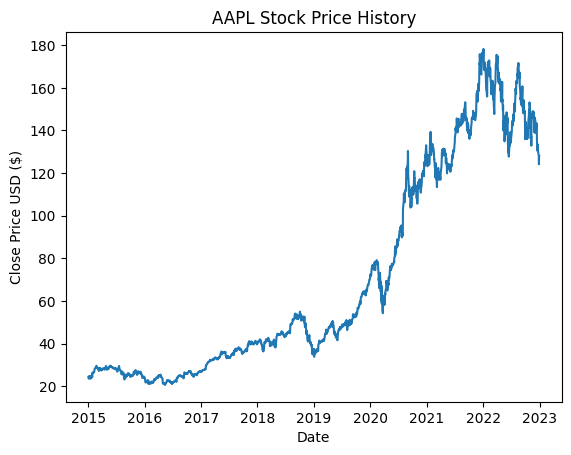

In [8]:
plt.plot(data)
plt.title(f'{ticker} Stock Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [10]:
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [11]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [12]:
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [13]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [14]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

C:\Users\anaka\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [16]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop])

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 112ms/step - loss: 0.0045 - val_loss: 9.4281e-04
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 3.0964e-04 - val_loss: 0.0018
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.3613e-04 - val_loss: 0.0019
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.2387e-04 - val_loss: 0.0016
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.1377e-04 - val_loss: 8.8167e-04
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 1.9978e-04 - val_loss: 7.8424e-04
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 1.9354e-04 - val_loss: 6.4652e-04
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 1.7576e-04 - val_loss: 0.0011
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 1.9367e-04 - val_loss: 6.3318e-04
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 1.7266e-04 - val_loss: 0.0011
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 2.0016e-04 - val_loss: 5.7434e-

In [17]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [18]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [19]:
y_train_actual = scaler.inverse_transform([y_train])
y_test_actual = scaler.inverse_transform([y_test])

In [20]:
plt.figure(figsize=(12, 6))
# Plot training data
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

<Figure size 1200x600 with 0 Axes>

In [21]:
test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (time_step * 2) + 1:len(scaled_data) - 1, :] = test_predict

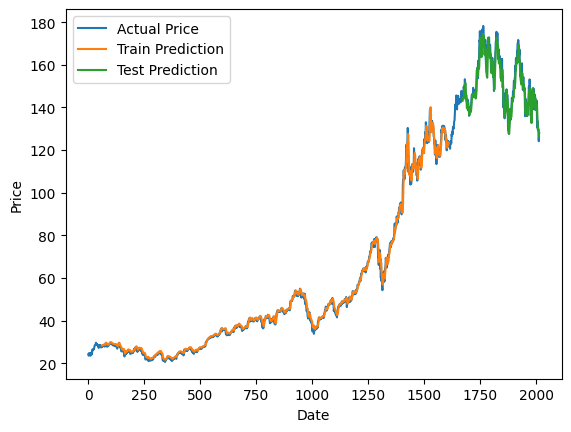

In [22]:
plt.plot(scaler.inverse_transform(scaled_data), label="Actual Price")
plt.plot(train_plot, label="Train Prediction")
plt.plot(test_plot, label="Test Prediction")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()